In [84]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

%matplotlib inline

In [127]:
# data processing

# read h5 file and transform to ndarray
train = h5py.File('train_catvnoncat.h5', "r")
train_x = np.array(train["train_set_x"])/255
train_y = np.array(train["train_set_y"])

test = h5py.File('test_catvnoncat.h5', "r")
test_x = np.array(test["test_set_x"])/255
test_y = np.array(test["test_set_y"])

# classes
classes = np.array(test["list_classes"])

# reshape data
train_x = train_x.reshape(train_x.shape[0], -1).T
train_y = train_y.reshape(1, train_y.shape[0])

test_x = test_x.reshape(test_x.shape[0], -1).T
test_y = test_y.reshape(1, test_y.shape[0])

In [110]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [131]:
# define a two-layer logistic regression model
class model:
    def __init__(self, dim):
        self.dim = dim
        self.W = np.zeros((dim, 1))
        self.b = 0
        
    def fit(self, X, Y, alpha=0.001, num_iterations=100):
        assert(X.shape[0] == self.dim)
        assert(X.shape[1] == Y.shape[1])
        
        m = X.shape[1]
        costs = []
        for i in range(num_iterations):
            A = sigmoid(np.dot(self.W.T, X) + self.b)
            # loss function
            cost = -1 / m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
            # gradient descent
            dW = 1 / m * np.dot(X,(A-Y).T)
            db = 1 / m * np.sum(A-Y)
            self.W -= alpha*dW
            self.b -= alpha*db
            
            costs.append(cost)
        return costs
    
    def predict(self, X):
        assert(X.shape[0] == self.dim)
        
        labels = np.dot(self.W.T, X)
        labels[labels>=0.5] = 1
        labels[labels<0.5] = 0
        return labels

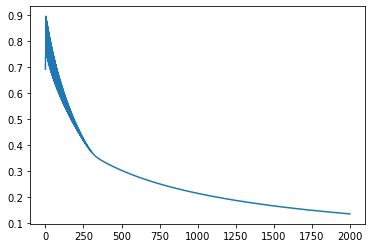

In [147]:
lg = model(train_x.shape[0])
costs = lg.fit(train_x, train_y, alpha=0.005, num_iterations=2000)
plt.plot(costs)

In [148]:
train_prediction = lg.predict(train_x)
train_prediction = train_prediction.reshape(train_x.shape[1])
train_labels = train_y.reshape(train_y.shape[1])
train_accuraccy = np.sum(train_prediction==train_labels)/train_x.shape[1]

test_prediction = lg.predict(test_x)
test_prediction = test_prediction.reshape(test_x.shape[1])
test_labels = test_y.reshape(test_y.shape[1])
test_accuraccy = np.sum(test_prediction==test_labels)/test_y.shape[1]

0.9808612440191388
0.7


In [169]:
print(train_accuraccy)
print(test_accuraccy)

0.9808612440191388
0.7


It is a non-cat


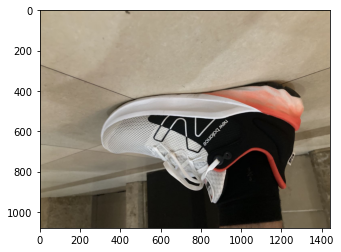

In [168]:
from PIL import Image

image = plt.imread("shoes.jpg")
my_image = np.array(Image.fromarray(image).resize((64, 64))).reshape((64*64*3, 1))
plt.imshow(image)
label = lg.predict(my_image)
c = classes[int(label)].decode('utf-8')
print("It is a " + c)